# Fisheye Checkerboard

In [176]:
#radius = 40
#stride = 15
#k = -0.00014

disk_diameter = 0.601 # [m]
margin_width = 0.01 # [m]
outline_width = 0.005 # [m]

radius = disk_diameter/2 - margin_width - outline_width
print(f"radius: {radius} [m]")

# /4*1.3  -3, 
# /4*1.4  -3, 
# /4*1.5  -3, # this one for the 0.601, 0.01, 0.005 one
stride = (radius/4)*1.5
print(f"stride: {stride} [m]")

k = -3

radius: 0.2855 [m]
stride: 0.10706249999999999 [m]


In [177]:
import numpy as np

class Line:
    def __init__(self, direction: np.ndarray, offset: np.ndarray):
        if not (isinstance(direction, np.ndarray) and isinstance(offset, np.ndarray)):
            raise TypeError("Both arguments must be numpy arrays.")
        if direction.shape != (2,) or offset.shape != (2,):
            raise ValueError("Each argument must be a numpy array of shape (2,).")
        
        self.direction = direction
        self.offset = offset

    def __repr__(self):
        return f"Line(direction={self.direction}, offset={self.offset})"

    def get(self, t: float):
        return t*self.direction + self.offset


In [178]:
lines = (
    [Line(
        direction=np.array([0, 1]), 
        offset=np.array([stride*i, 0])
    ) for i in range(-5, 6)] + 
    [Line(
        direction=np.array([1, 0]), 
        offset=np.array([0, stride*i])
    ) for i in range(-5, 6)]
)

In [179]:
t_values = np.linspace(-5*stride, 5*stride, 100)
lines_points = [np.array([line.get(t) for t in t_values]) for line in lines]

In [180]:
def distord_point(point: np.ndarray):
    if not isinstance(point, np.ndarray):
        raise TypeError("Point must be a numpy array.")
    if point.shape != (2,):
        raise ValueError("Point must be a numpy array of shape (2,).")
    
    #return point + k*(pow(point[0], 2) + pow(point[1], 2)) * point
    r2 = np.dot(point, point)  # Equivalent to x^2 + y^2
    #factor = 1 + k * r2
    factor = 1 / (1 - k*r2)

    #print(f"Point: {point}, r^2: {r2}, Factor: {factor}, Distorted Point: {factor * point}")
    return factor * point  # Apply distortion factor to both x and y

def distord_line(line: np.ndarray):
    if not isinstance(line, np.ndarray):
        raise TypeError("Line must be a numpy array.")
    return np.array([distord_point(point) for point in line])

def distord_lines(lines: list[np.ndarray]):
    if not isinstance(lines, list):
        raise TypeError("Lines must be a list of lines.")
    return [distord_line(line) for line in lines]

In [181]:
distorded_lines = distord_lines(lines_points)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


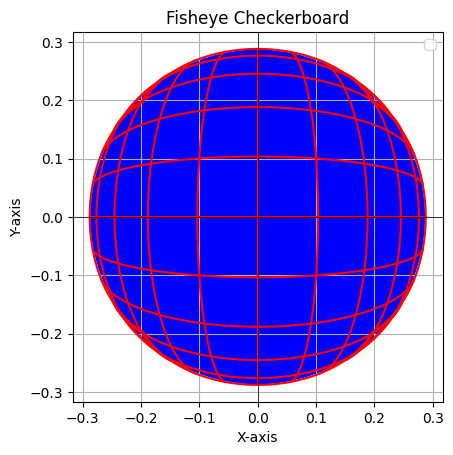

In [182]:
import matplotlib.pyplot as plt
# Plot the line
for line_points in distorded_lines:
    plt.plot(line_points[:, 0], line_points[:, 1], color="red")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.legend()
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Fisheye Checkerboard")

fig = plt.gcf()
ax = fig.gca()

ax.set_aspect('equal')

circle1 = plt.Circle((0, 0), radius, color='b')
ax.add_patch(circle1)

plt.show()